## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### **Dataset Preparation**

In [ ]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-05-20 09:43:12--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 142.251.163.138, 142.251.163.100, 142.251.163.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-05-20 09:43:12--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.4

In [ ]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [ ]:
data_df['date'] = data_df['date'].str.replace("T000000","")       # Remove T000000 part from data column. Hint: search about .str.replace() method. :)
data_df['date'] = data_df['date'].astype(int)
data_array = data_df.drop(columns='id')                                             # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

data_array.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [ ]:
mean = (np.mean(data_array,axis=0))        # this should be an array, each entry should be mean of a column
sd =  np.std(data_array, axis=0)                               # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [ ]:
data_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data_array_norm

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.651343,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.607163,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,1.425078,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,-0.607163,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,1.423501,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.762241,-0.490545,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,0.468382,1.004958,-0.938069,-0.666135,-0.412381
21609,1.424628,-0.381588,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,1.272063,-0.356180,-1.051685,-0.228419,-0.203946
21610,-0.739250,-0.375865,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,1.234683,0.247888,-0.604321,-1.410253,-0.394141
21611,1.400509,-0.381588,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.952078,-0.184414,1.028910,-0.841221,-0.420511


In [ ]:
labels = data_df.iloc[:,2]                                                                                                        # extract the price column from data

x_array_norm = np.delete(data_array_norm, 1,axis=1)                    # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [ ]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.mean((y_pred-y_true)**2)                      # fill code here

  return mse

In [ ]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a) + b;                # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)
  y_true = y_true.astype(float)
  d=[1]*n
  for k in range(0,n,1):
    d[k] = 2*np.mean(x[:,k]*np.subtract(yp,y_true))  # this is element wise multiplication...can use np.multiply

  da = np.array(d)              # write code to calculate derivative of loss with respect to a
  db = 2*np.mean(np.subtract(yp,y_true))             # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []
  V = [0]*n                                                 # initialize empty list to store loss
  a =  np.array(v)               # initialize a- weights and b- bias
  b = np.random.rand()

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b

    l_mse = loss(y(x,a,b),y_true)                                # calculate loss at this point
    loss_mse.append(l_mse)
    da,db = gradient(x,a,b,y_true);
    a -= learning_rate*da;
    b -= learning_rate*db;
    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [ ]:
epochs = 10                 # tweak this!!!
learn_rate = 0.0001         # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,learn_rate,epochs)

Epoch  1  Completed! loss =  421330980695.51495
Epoch  2  Completed! loss =  421082409628.0041
Epoch  3  Completed! loss =  420834125001.8399
Epoch  4  Completed! loss =  420586126325.7586
Epoch  5  Completed! loss =  420338413109.4659
Epoch  6  Completed! loss =  420090984863.63464
Epoch  7  Completed! loss =  419843841099.9033
Epoch  8  Completed! loss =  419596981330.8738
Epoch  9  Completed! loss =  419350405070.10913
Epoch  10  Completed! loss =  419104111832.132
Training completed!!


### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  452929381874.6965


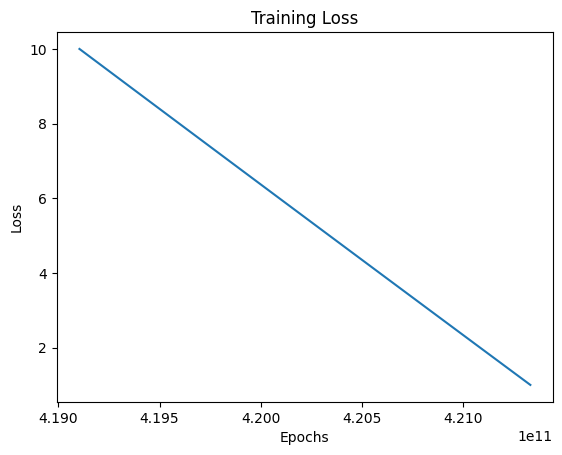

In [ ]:
test_loss = loss(y(x_test,a,b),y_test)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(train_loss,range(1, epochs + 1))                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [1]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("No. of training examples = ",y_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])
x_train

11490434/11490434 [==============================] - 2s 0us/step
No. of training examples =  60000
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
x_train.shape

(60000, 28, 28)

label: 2       5       2       8       6       

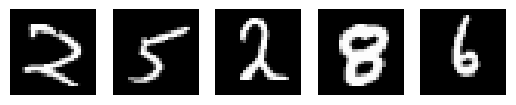

In [4]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [9]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0], -1)                                     # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0], -1)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

validation_indices = np.random.choice(x_train.shape[0], n_validation, replace=False)
training_indices = np.setdiff1d(np.arange(x_train.shape[0]), validation_indices)

x_validation = x_train[validation_indices]
y_validation = y_train[validation_indices]

x_train = x_train[training_indices]
y_train = y_train[training_indices]


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [10]:
from keras.layers import Conv2D, Flatten, Dense
import tensorflow as tf

model = keras.models.Sequential([
    (Conv2D(64,kernel_size=3,activation='relu',input_shape = (28,28,1))),
    (Conv2D(32,kernel_size=3,activation='relu',input_shape = (28,28,1))),
    (Conv2D(32,kernel_size=3,activation='relu',input_shape = (28,28,1))),
    Flatten(),
    Dense(10,activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ae758e098a0>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [11]:
y_train.shape

(40000,)

In [15]:
x_test.shape

(10000, 28, 28)

In [12]:
model.compile(optimizer="adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

# y_train = tf.one_hot(y_train,depth=10);
# y_test = tf.one_hot(y_test,depth=10);

n_epochs = 10               # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train,y_train,epochs=5,validation_data = (x_validation,y_validation))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 [==============================] - 10s 5ms/step - loss: 0.2036 - accuracy: 0.9523 - val_loss: 0.0855 - val_accuracy: 0.9734
Epoch 2/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0994 - val_accuracy: 0.9718
Epoch 3/5
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0448 - accuracy: 0.9855 - val_loss: 0.0783 - val_accuracy: 0.9787
Epoch 4/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.1014 - val_accuracy: 0.9751
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.1226 - val_accuracy: 0.9719


### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Loss =  0.0
Accuracy =  0.0 %


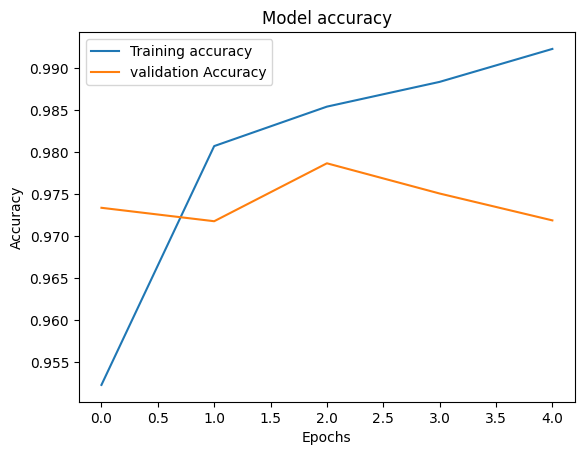

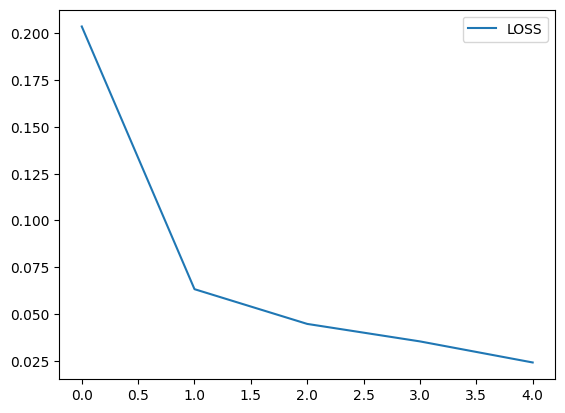

In [16]:
results = model.evaluate(x_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
# ...
# Plot Accuracy...
plt.plot(history.history['loss'], label="LOSS")
# plt.plot(history.history['val_accuracy'], label="validation Accuracy")
# plt.title("Model accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
plt.legend()
plt.show()

Lets show our results on images from testing dataset

label: 
1       2       9       4       4       

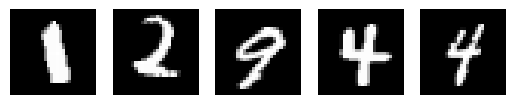

Predicted value: 
313/313 [==============================] - 1s 2ms/step
4      

In [18]:
n = 5   # = no. of images to see predictions on

index = np.random.choice(x_test.shape[0],5)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap = 'gray')             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...
    predict = model.predict(x_test)
    digit = np.argmax(predict[ind])
    print(digit,end="      ")